#### Exercise 4

Import and plot the time series co2-ppm.

Try to plot the series and decompose it.

Find the distribution of the residual part. Does it follow a Gaussian curve?

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (25.0, 15.0)
sns.set()

In [ ]:
df = pd.read_csv('co2-ppm-daily_csv.csv',parse_dates=True,
                 index_col='date'
                 )


df.describe()

,value
count,19419.000000
mean,356.781336
std,27.753242
min,312.330000
25%,332.310000
50%,354.630000
75%,378.570000
max,418.320000


In [ ]:
df.head()

,value
date,
1958-03-30,316.16
1958-03-31,316.40
1958-04-02,317.67
1958-04-03,317.76
1958-04-04,317.09


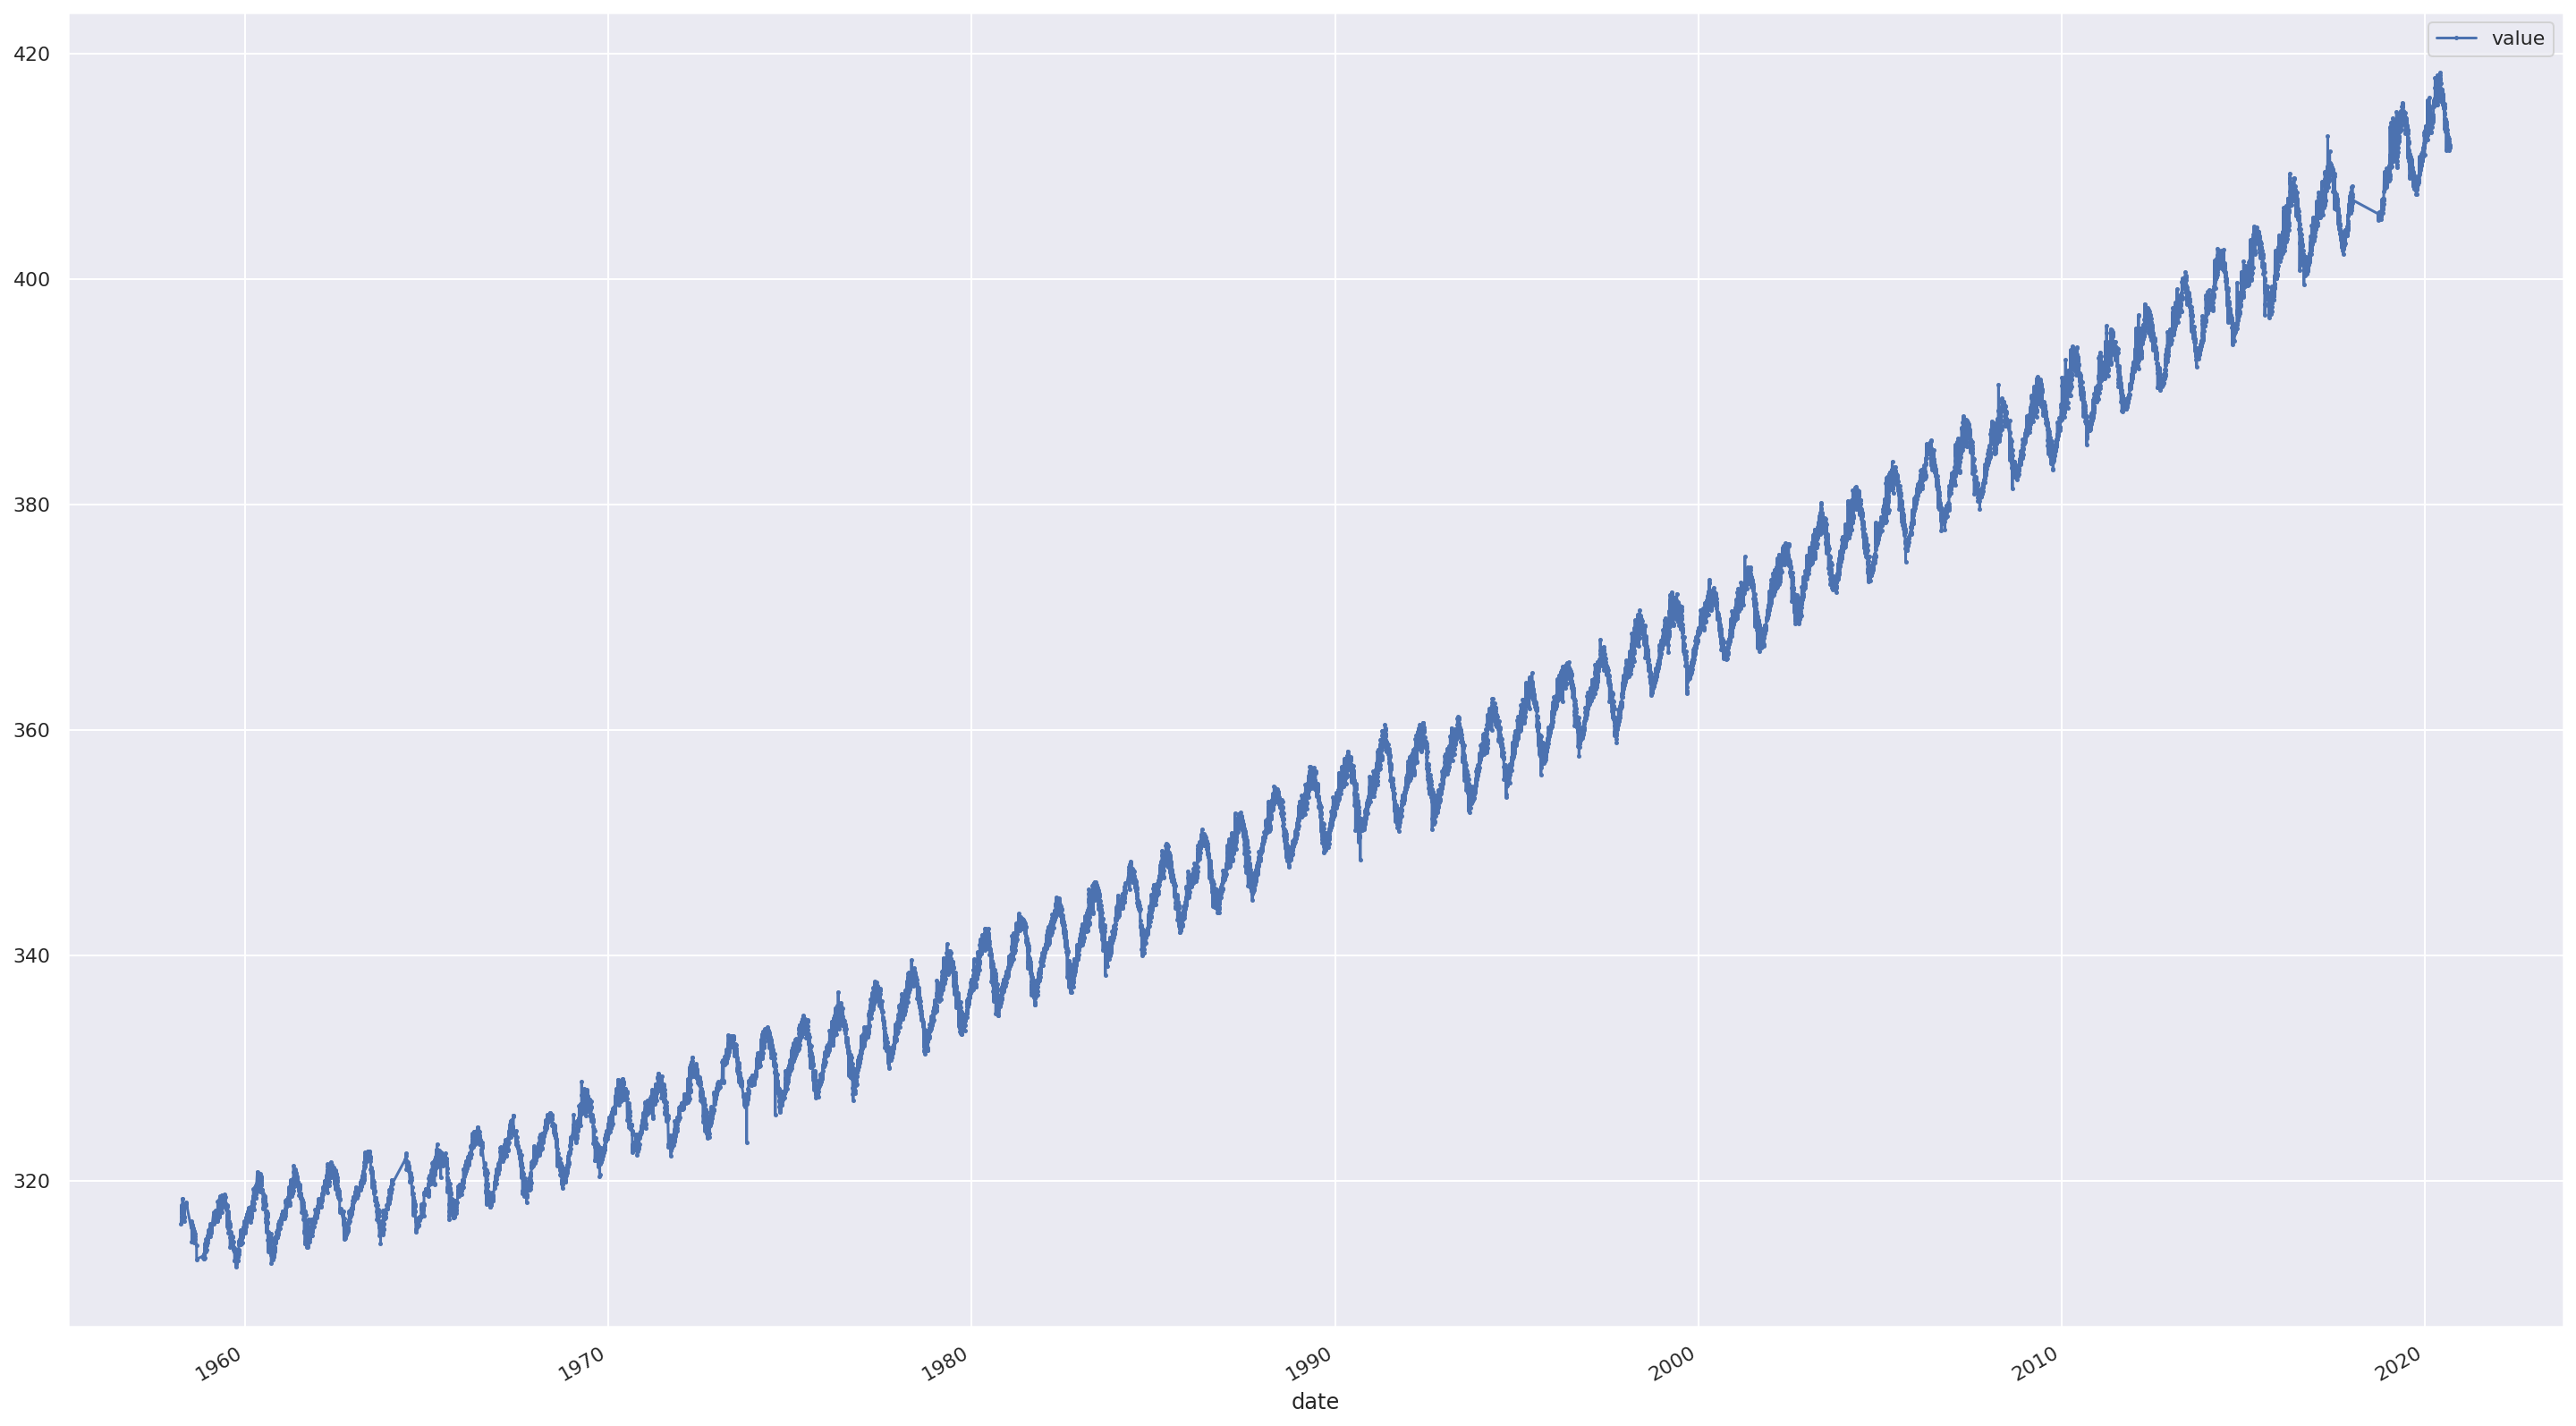

In [ ]:
subplots = df.plot(figsize=(25, 15),
                   marker='.',
                   markersize=3,
                   linestyle='-',
                   subplots=True)
subplots;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19419 entries, 1958-03-30 to 2020-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   19419 non-null  float64
dtypes: float64(1)
memory usage: 303.4 KB


In [ ]:
df = df.dropna()

df = df.sort_index()

array([<AxesSubplot:xlabel='date'>], dtype=object)

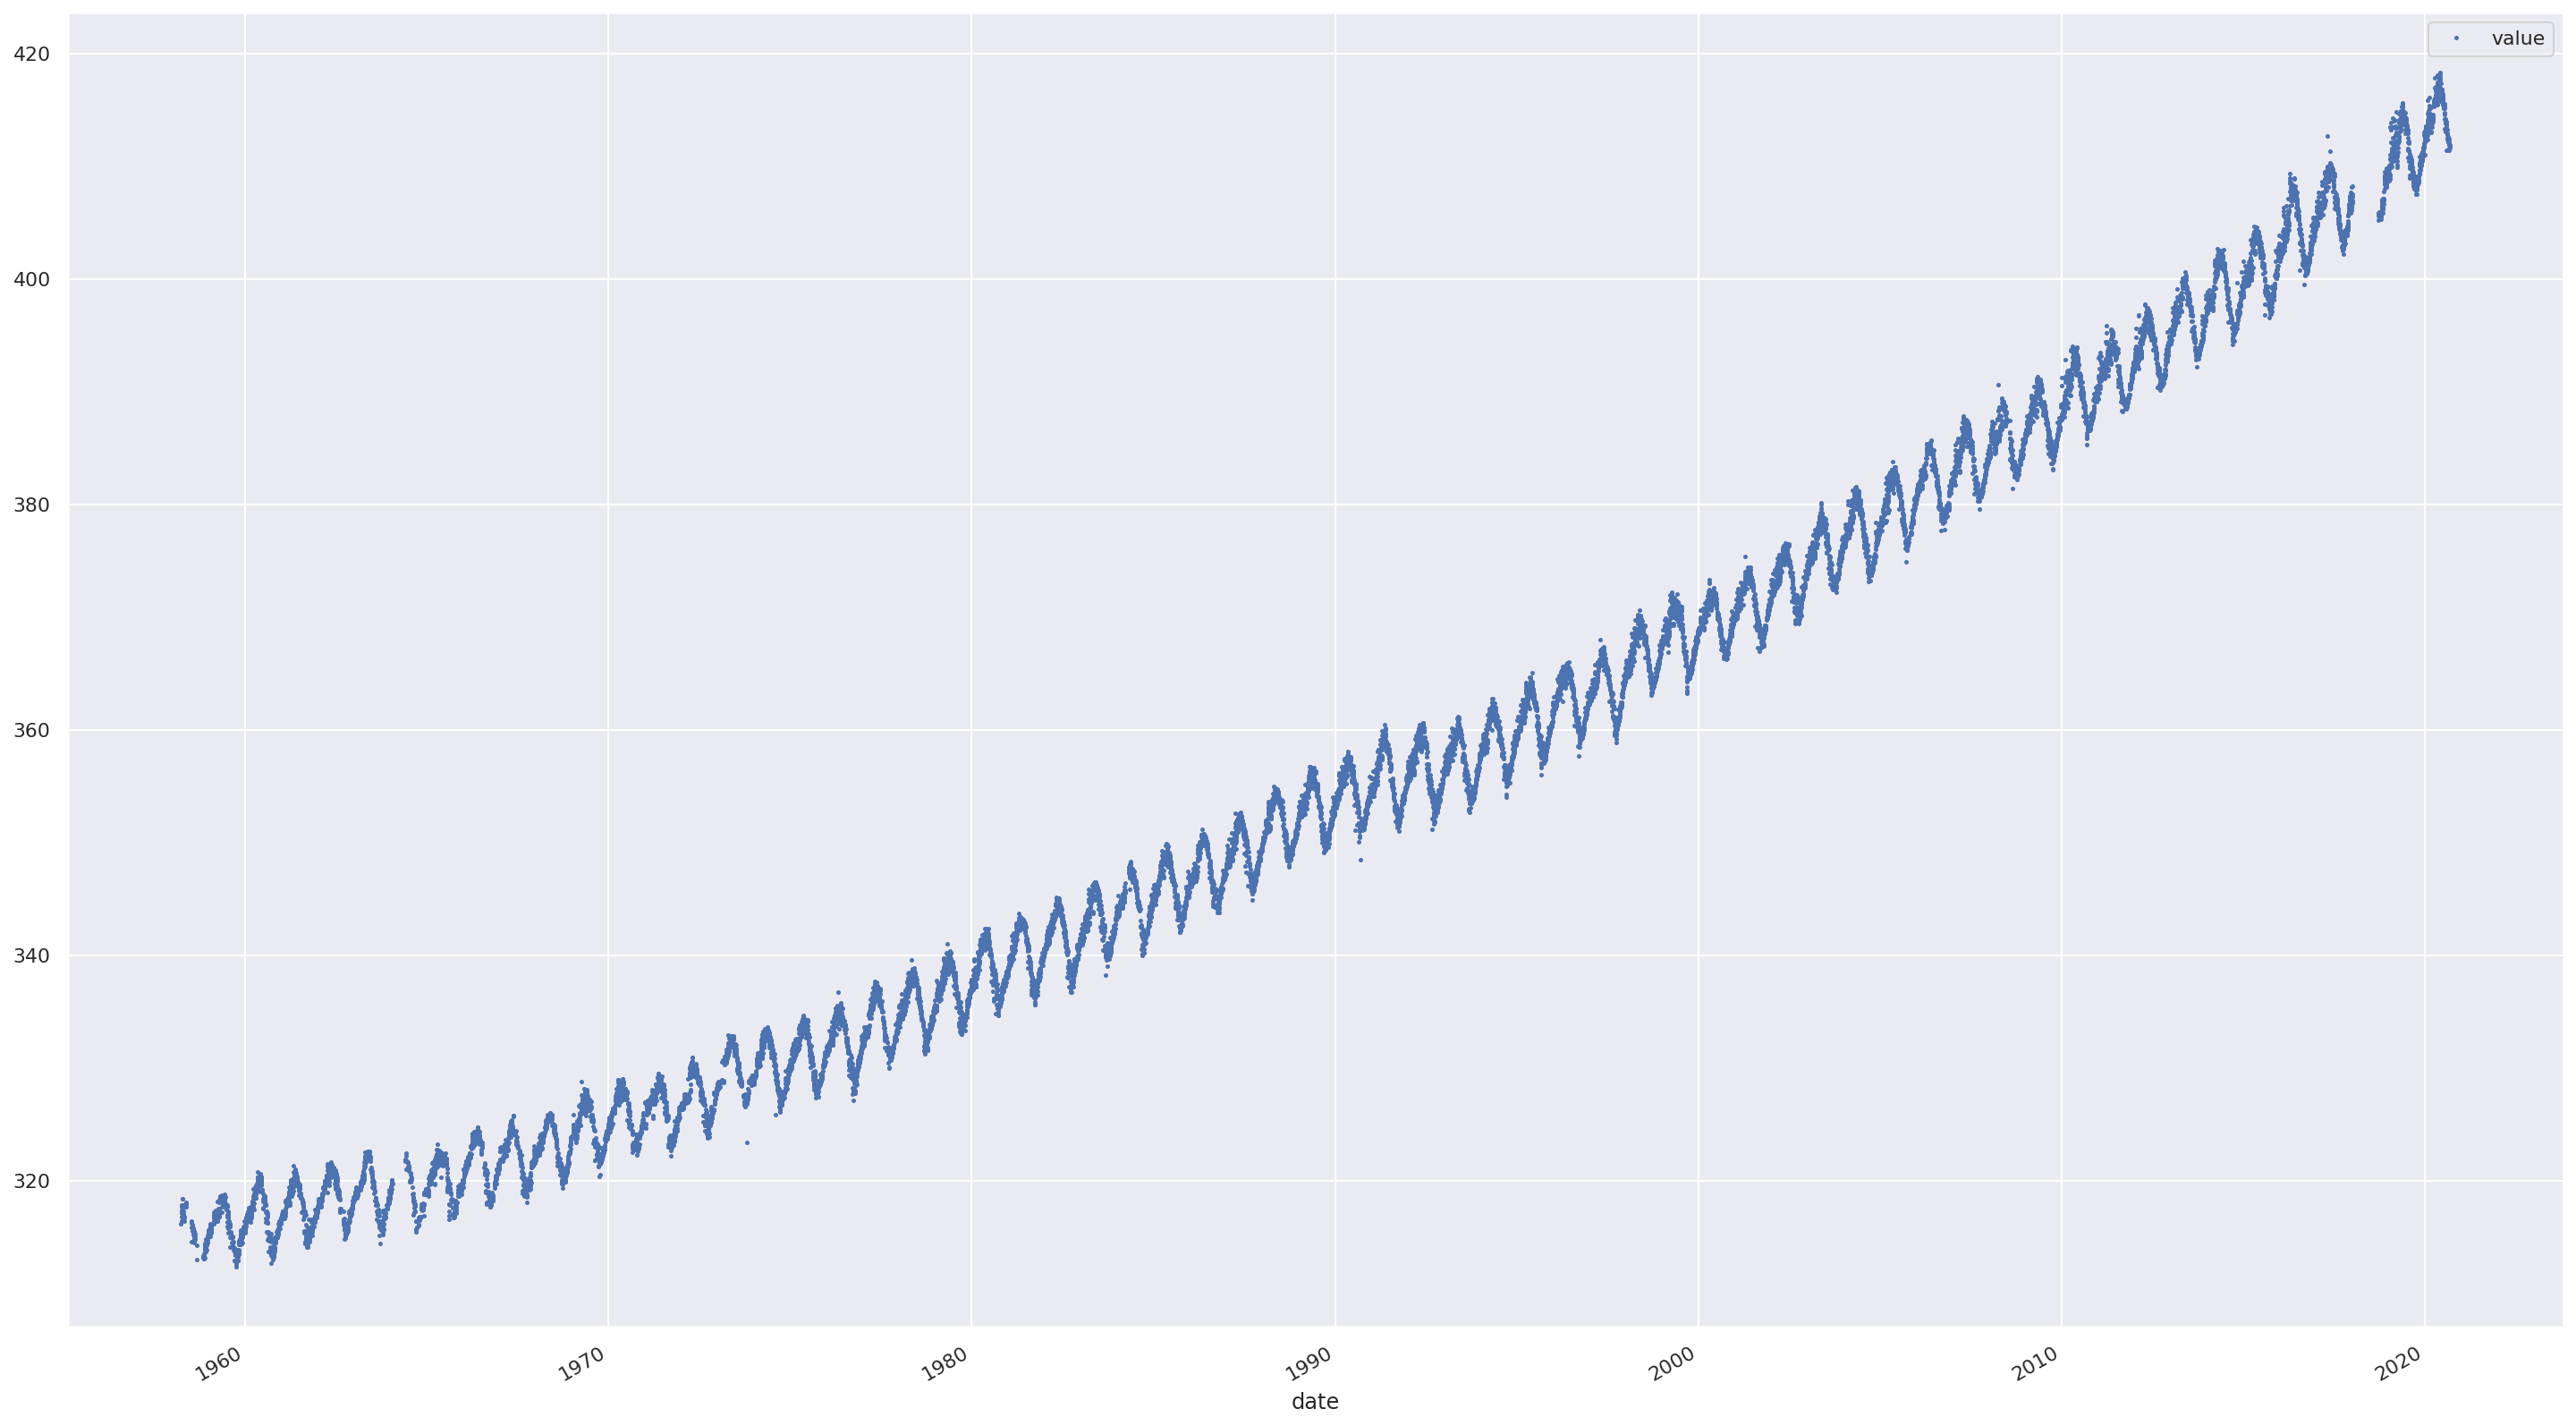

In [ ]:
df.plot(figsize=(25, 15),
                   marker='.',
                   markersize=3,
                   linestyle=' ',
                   subplots=True)

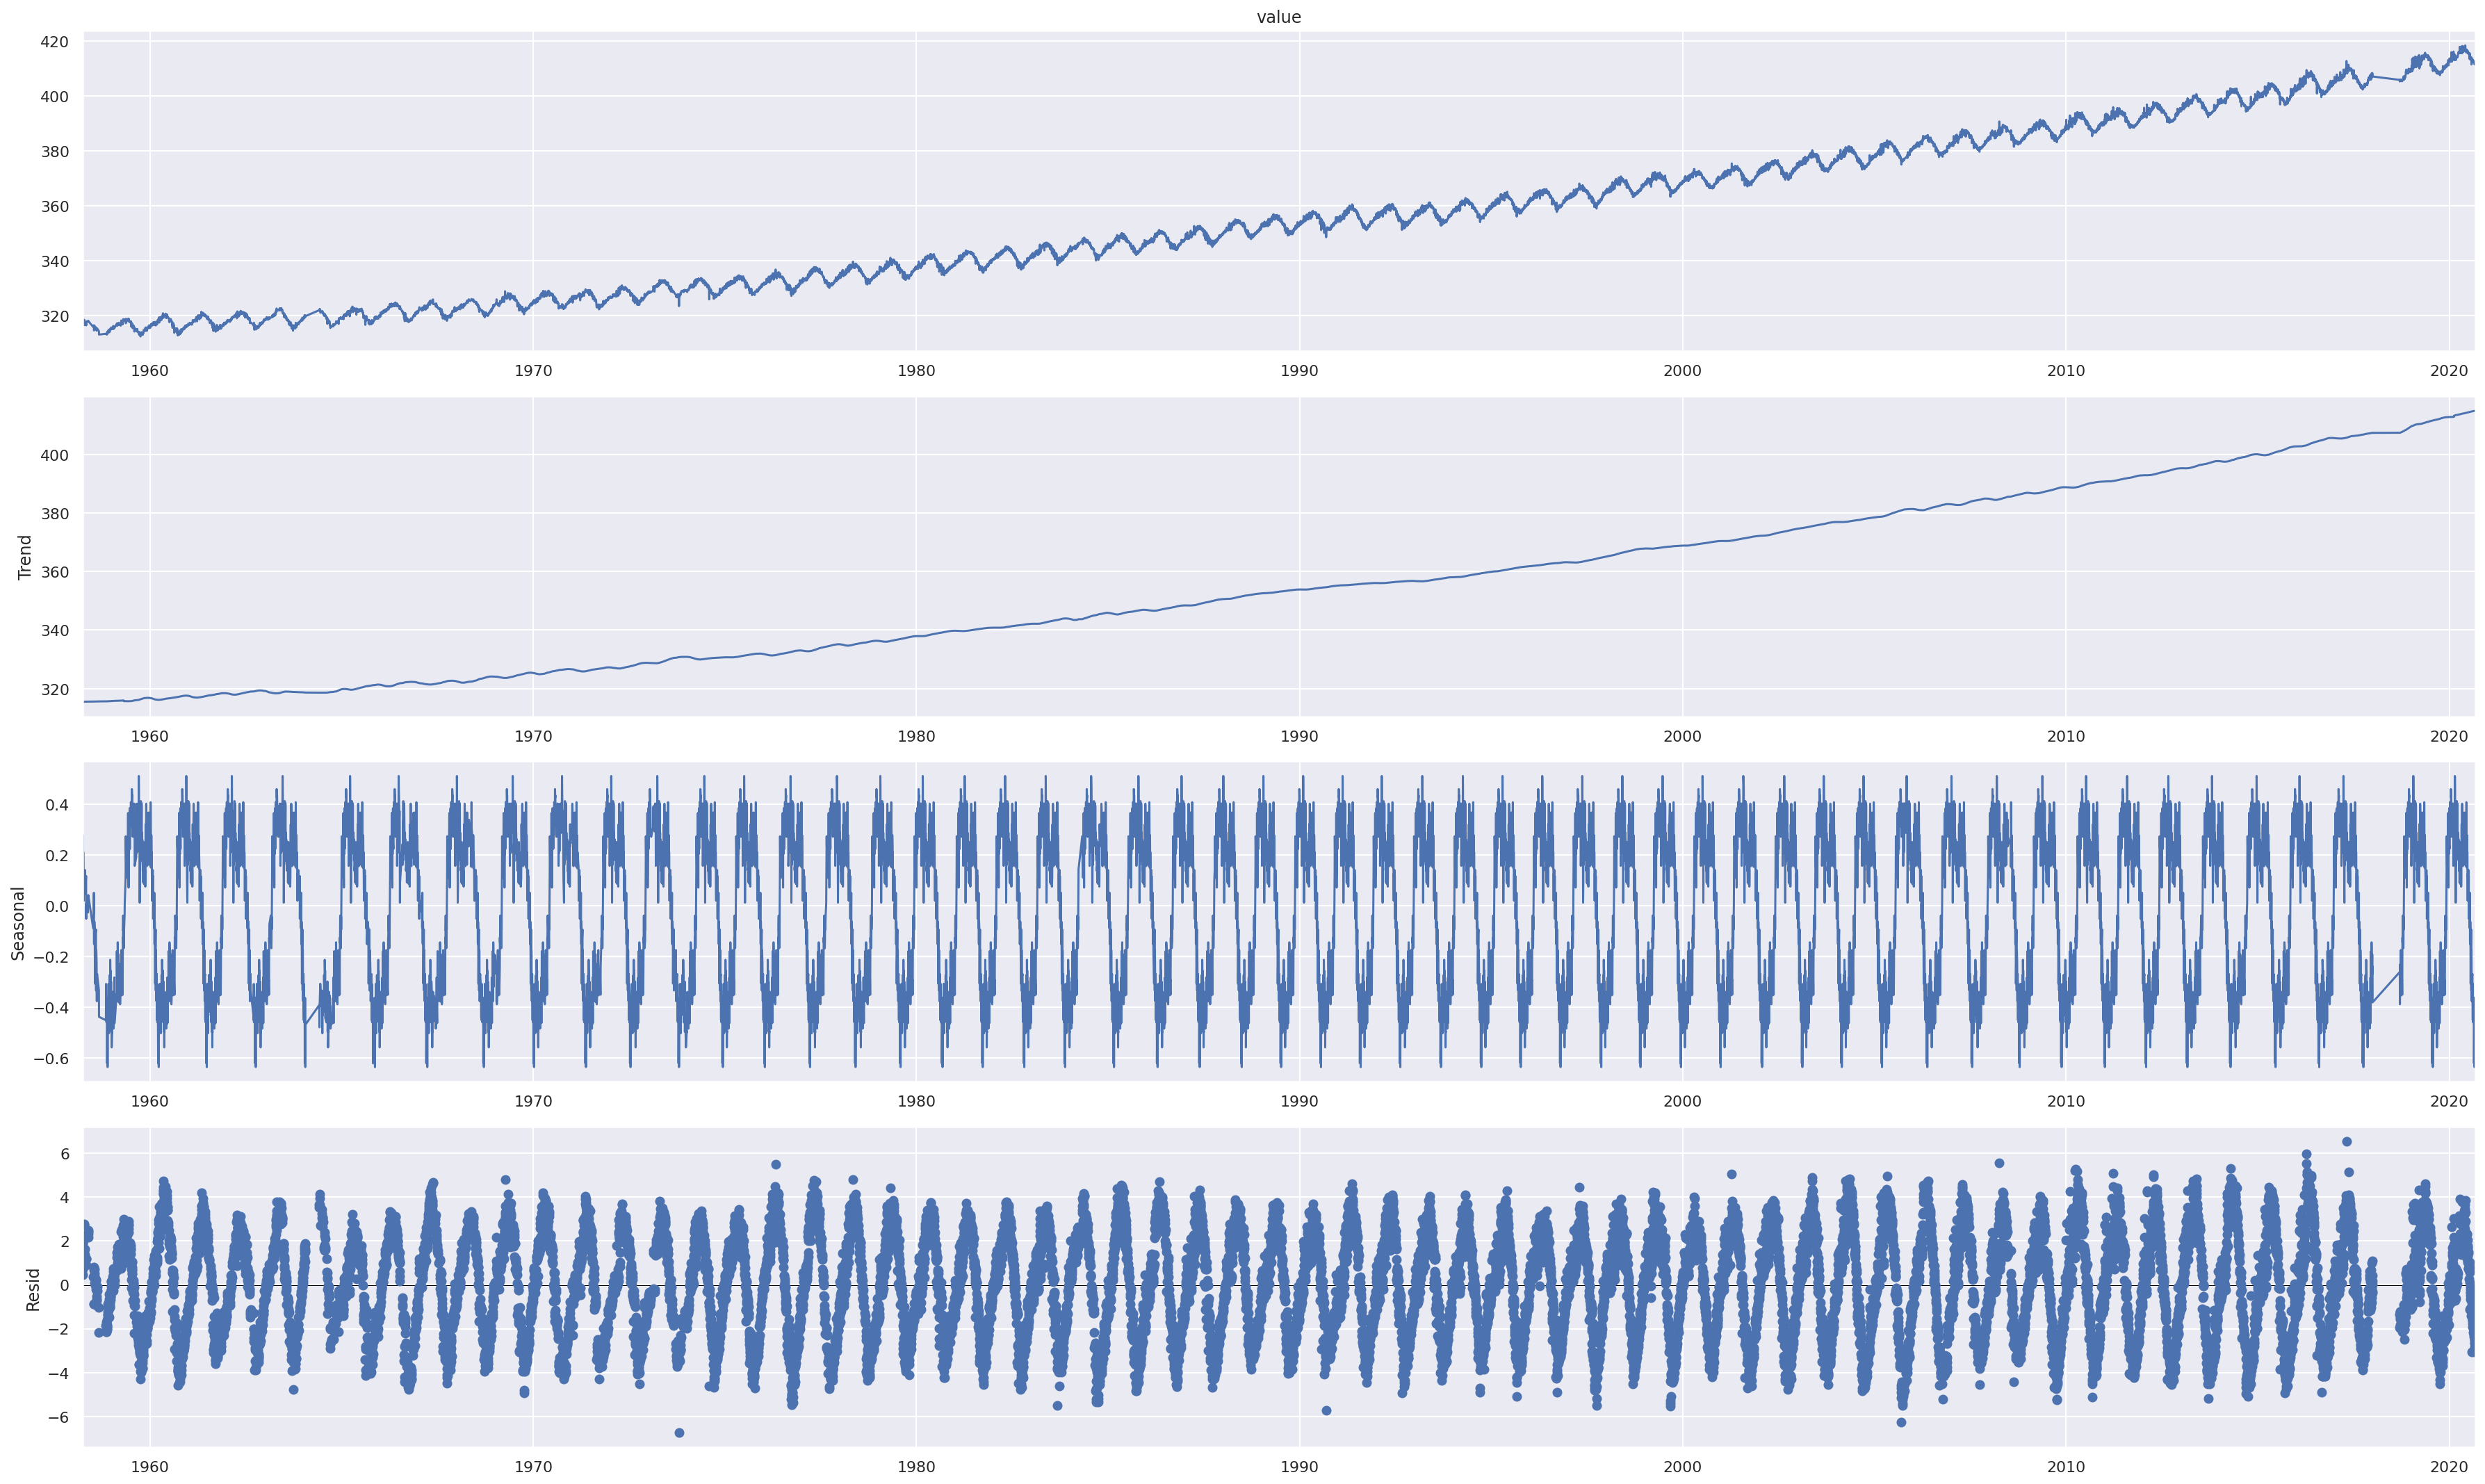

In [ ]:
decomp_mul = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['value'], order=(0, 1, 0))  
results_AR = model.fit()  
print(results_AR.summary())

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                19419
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -16110.349
Date:           

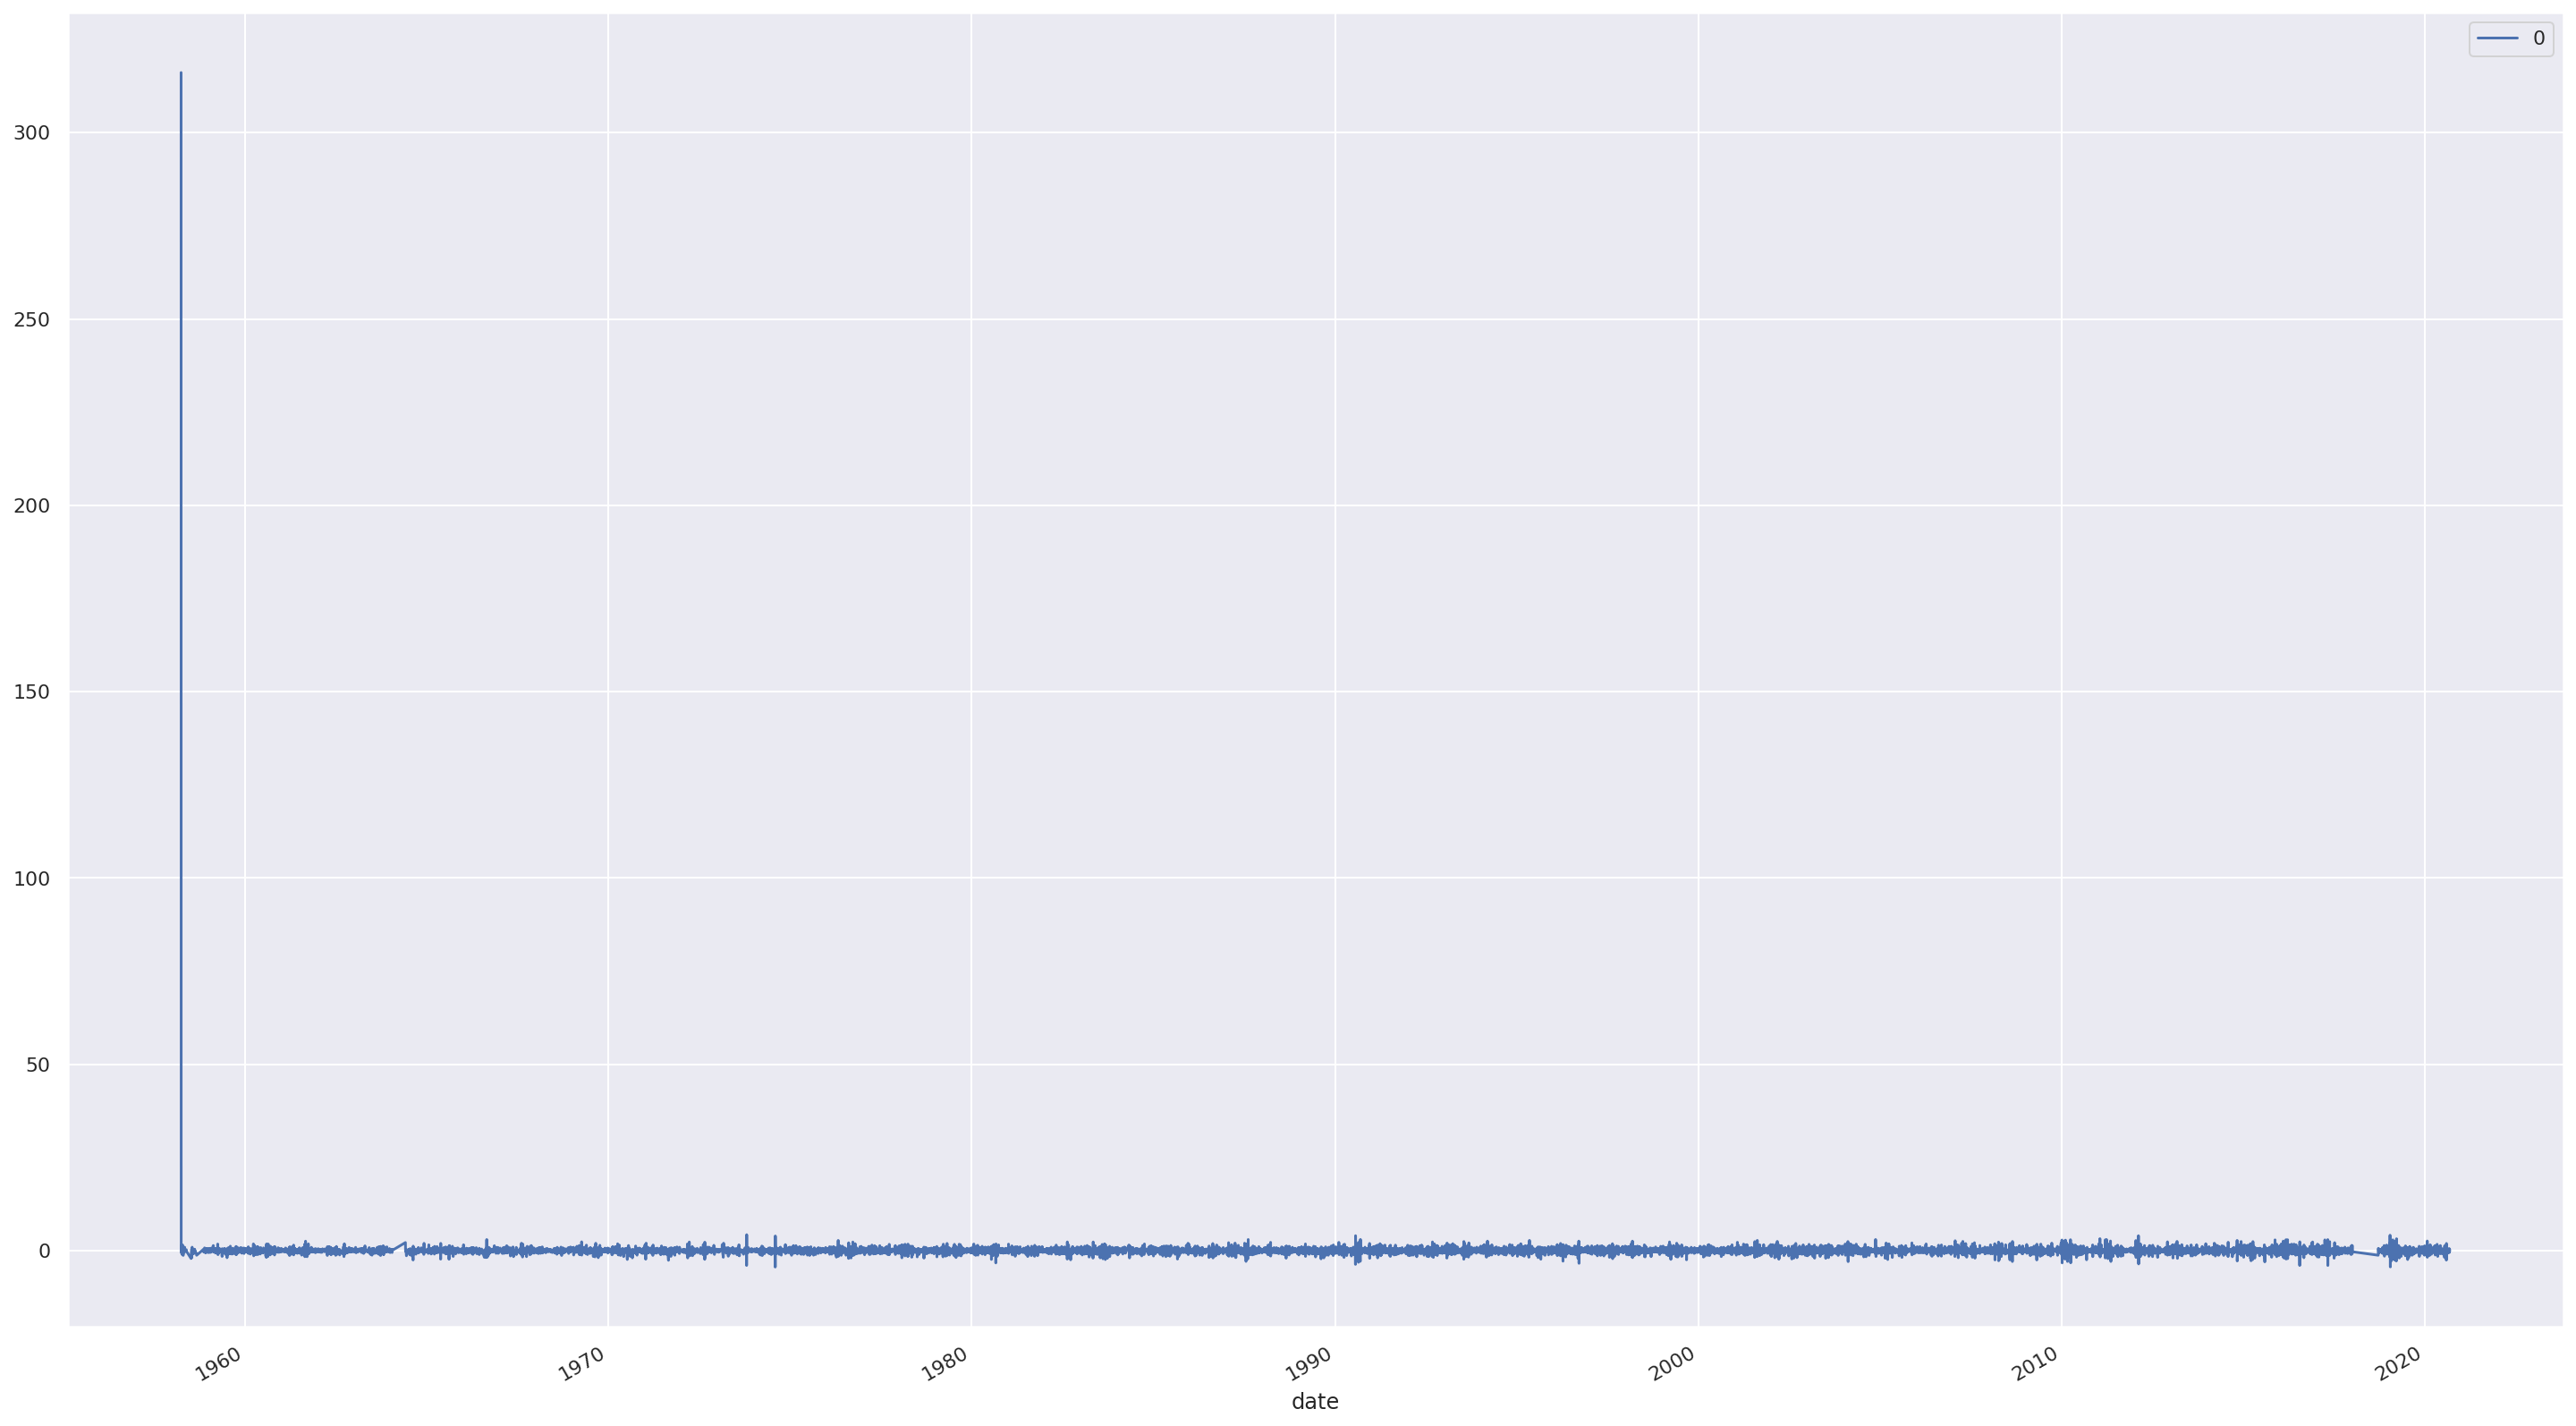

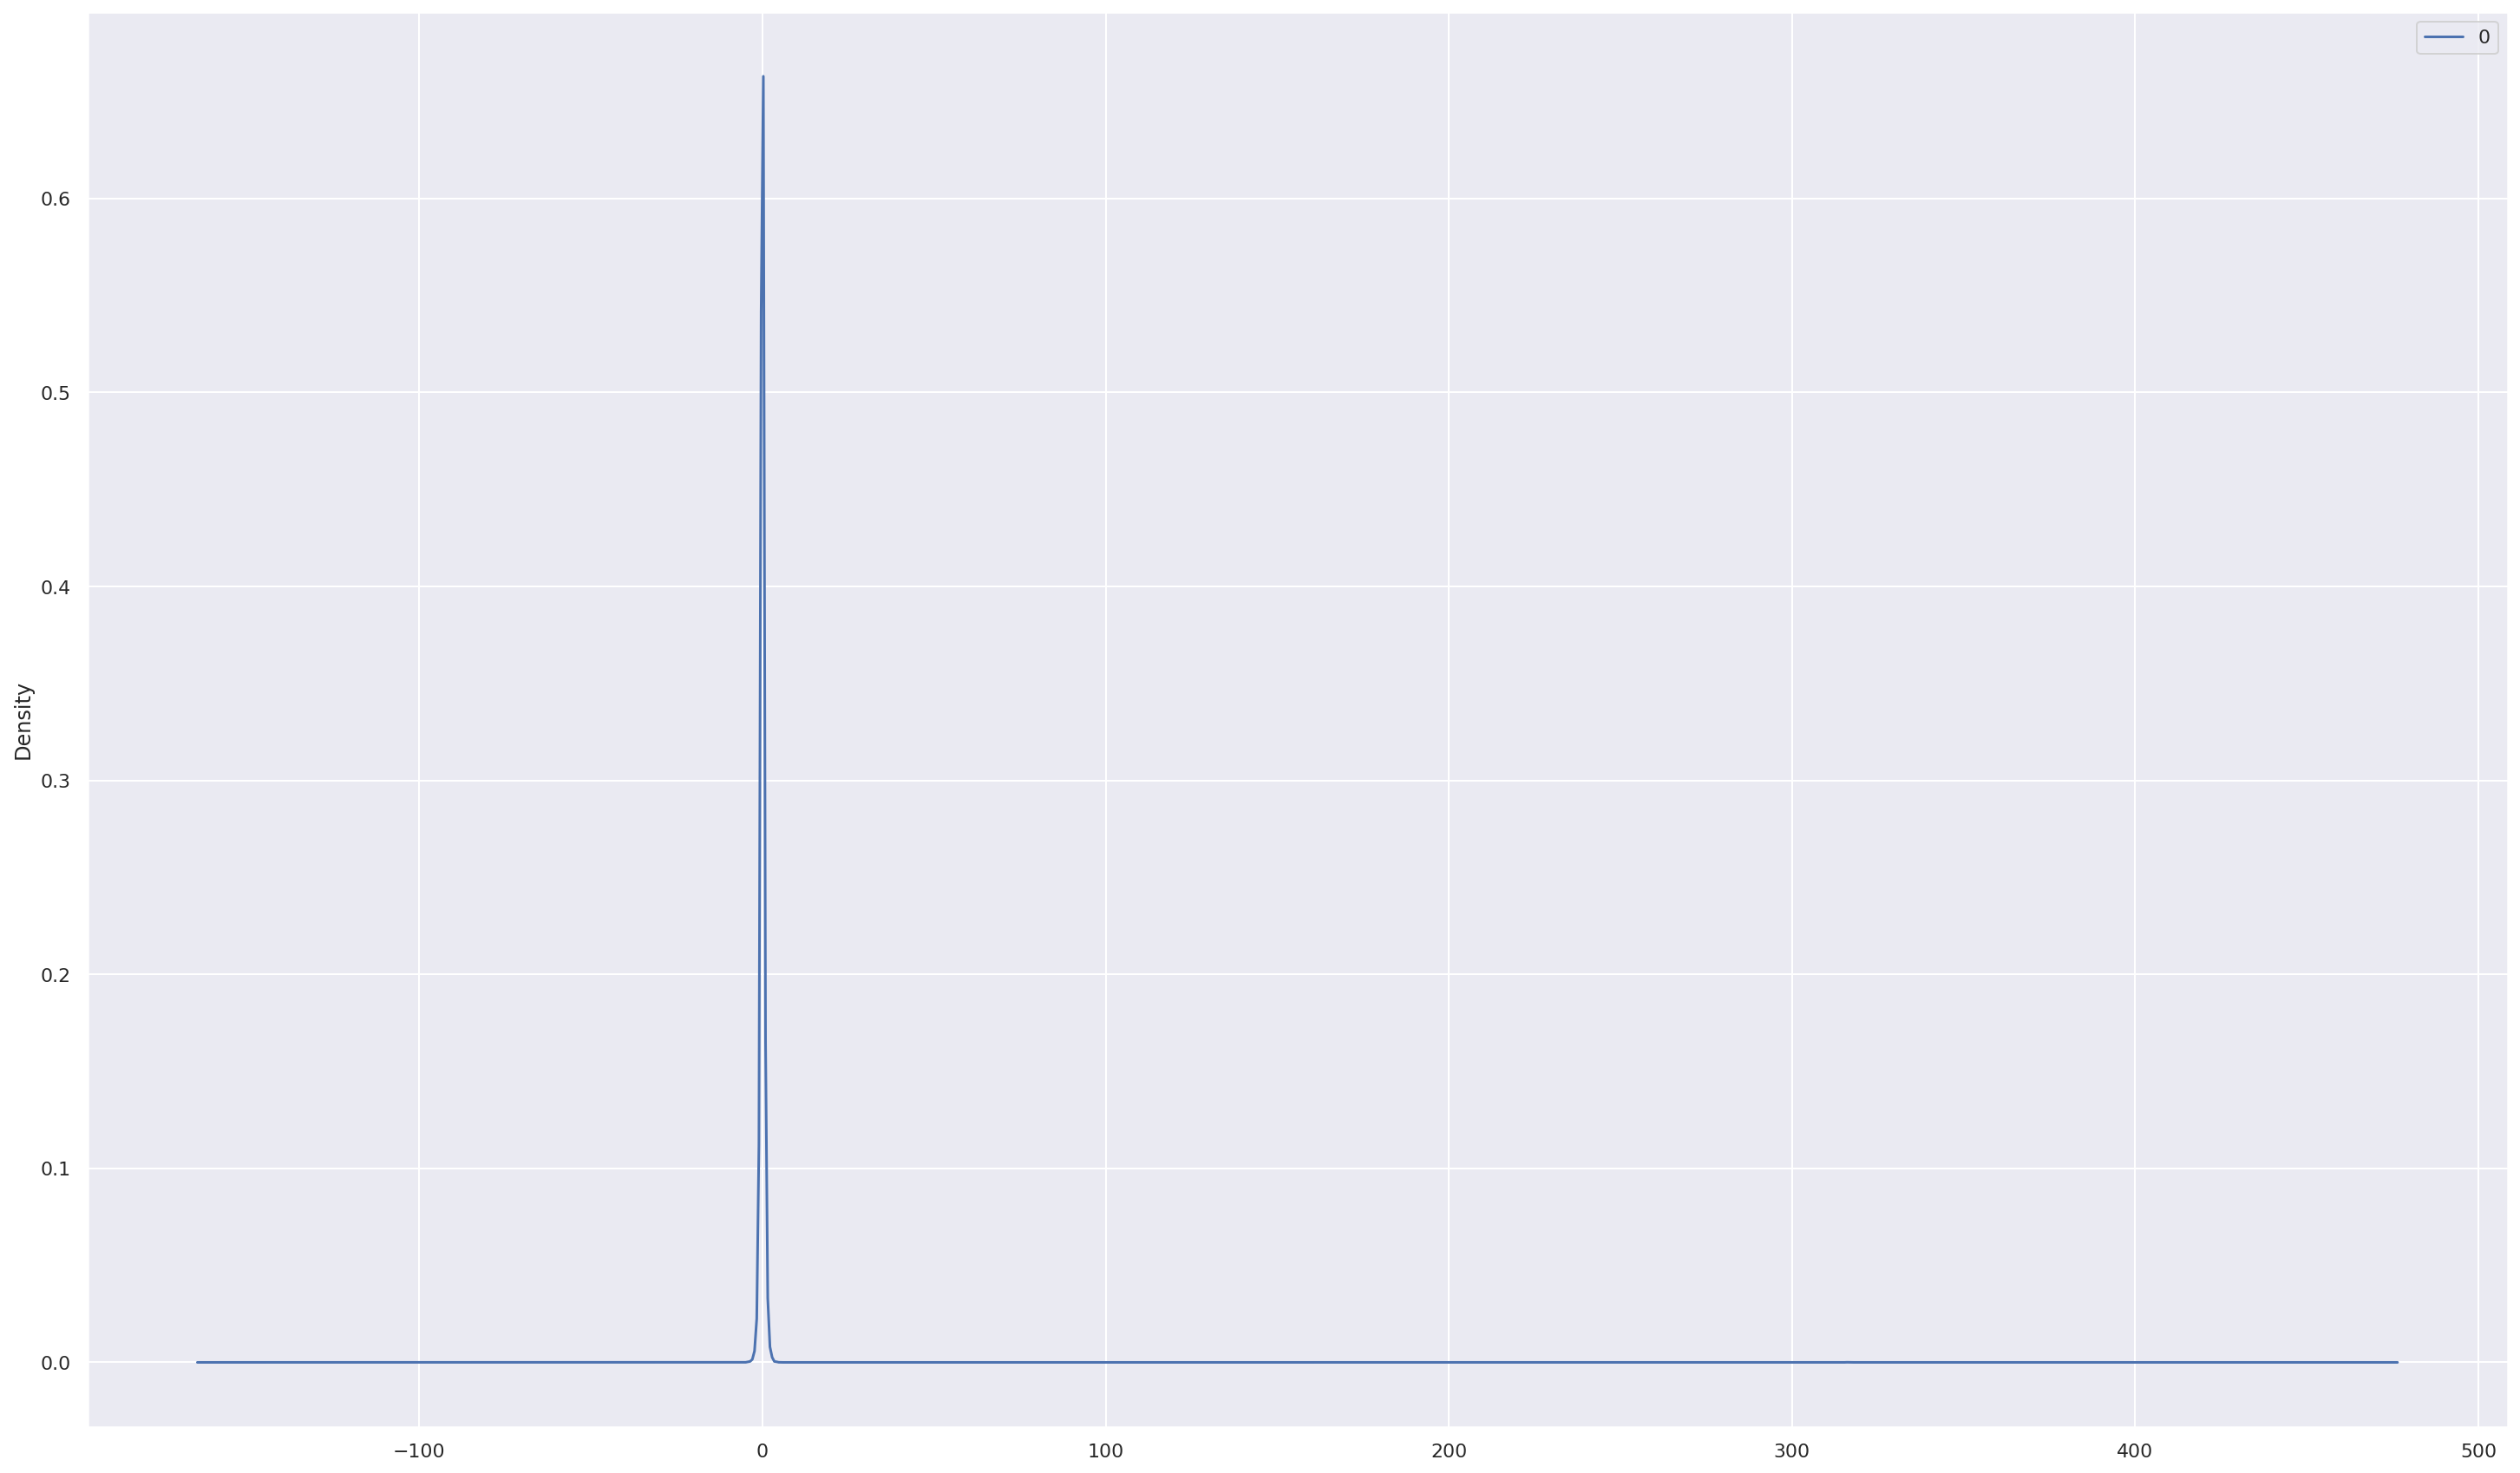

In [ ]:
# line plot of residuals
residuals = pd.DataFrame(results_AR.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show();

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

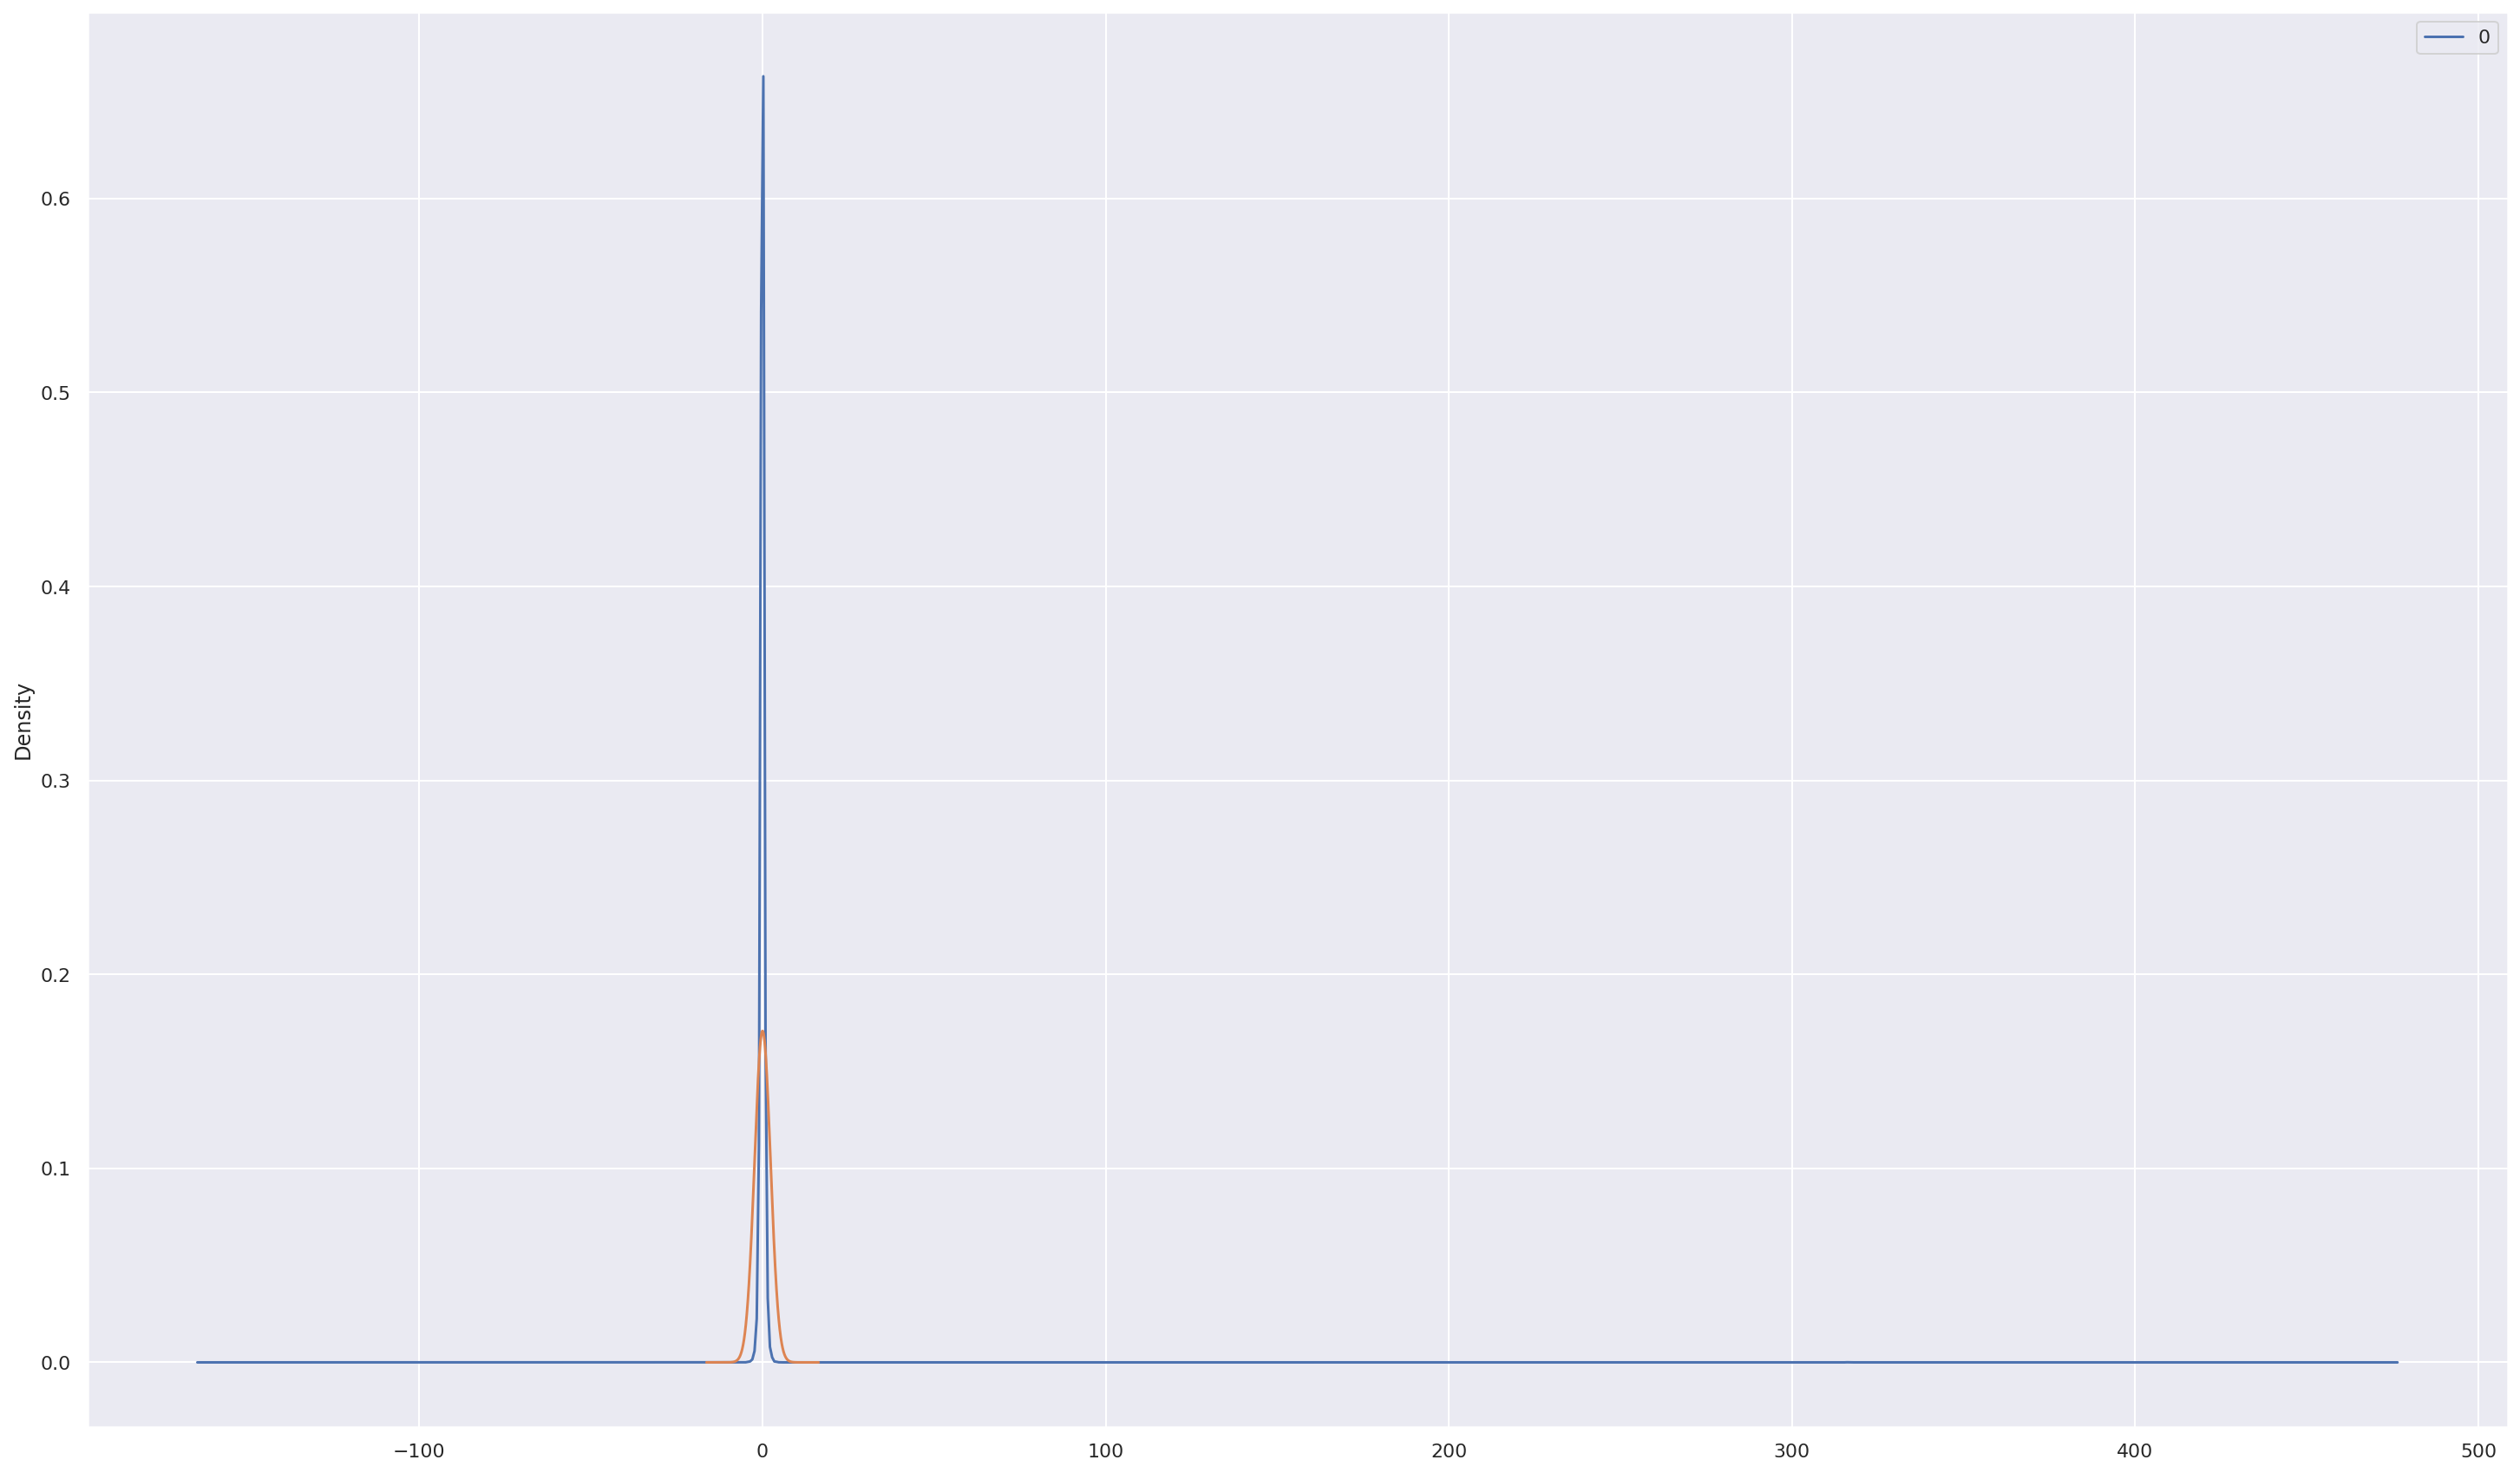

In [ ]:
import math
import scipy.stats as stats

variance = np.var(residuals)
mu = np.mean(residuals)
sigma = math.sqrt(variance)
x = np.linspace(mu - 7*sigma, mu + 7*sigma,10000)
plt.plot(x, stats.norm.pdf(x, mu, sigma), residuals.plot(kind='kde'))

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51473f4b-c066-448b-9585-b1955fea67d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>